In [1]:
PATH_train = 'data/wine_train.csv'
PATH_test = 'data/wine_test.csv'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.base import clone
from sklearn.metrics import r2_score


# 3 digits floating points prints
pd.set_option('display.precision', 3)

rd_state = 42

# Load and Prepare the Dataset

In [3]:
# Load the dataset
data = pd.read_csv(PATH_train)
data.drop(columns=['wine_ID'], inplace=True)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
0,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.997,3.38,0.55,10.1,0,5
1,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.989,3.06,0.34,12.9,0,7
2,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.993,2.91,0.32,9.9,0,5
3,6.0,0.17,0.29,9.7,0.044,33.0,98.0,0.995,3.12,0.36,9.2,0,6
4,7.5,0.19,0.34,2.6,0.037,33.0,125.0,0.992,3.10,0.49,11.1,0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4547 non-null   float64
 1   volatile acidity      4547 non-null   float64
 2   citric acid           4547 non-null   float64
 3   residual sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free sulfur dioxide   4547 non-null   float64
 6   total sulfur dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   pH                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  wine_type             4547 non-null   int64  
 12  target                4547 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 461.9 KB


In [5]:
# Split the dataset into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_state)

# create different dataset for wine type
X0_train, X1_train = X_train[X_train['wine_type'] == 0].drop(columns=['wine_type']), X_train[X_train['wine_type'] == 1].drop(columns=['wine_type'])
y0_train, y1_train = y_train[X_train['wine_type'] == 0], y_train[X_train['wine_type'] == 1]

X0_test, X1_test = X_test[X_test['wine_type'] == 0].drop(columns=['wine_type']), X_test[X_test['wine_type'] == 1].drop(columns=['wine_type'])
y0_test, y1_test = y_test[X_test['wine_type'] == 0], y_test[X_test['wine_type'] == 1]

data0 = pd.concat([X0_train, y0_train], axis=1)
data1 = pd.concat([X1_train, y1_train], axis=1)



In [6]:
# Standardize the features to have a mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler0, scaler1 = StandardScaler(), StandardScaler()
X0_train = scaler0.fit_transform(X0_train)
X0_test = scaler0.transform(X0_test)

X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

# Exploratory Data Analysis

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
count,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000,4547.000
mean,7.235,0.340,0.318,5.368,0.056,30.364,115.502,0.995,3.219,0.533,10.496,0.250,5.824
std,1.320,0.167,0.143,4.748,0.035,17.869,56.989,0.003,0.164,0.151,1.180,0.433,0.876
min,3.800,0.080,0.000,0.600,0.012,1.000,6.000,0.987,2.740,0.220,8.000,0.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,0.000,5.000
50%,7.000,0.290,0.310,2.900,0.047,29.000,118.000,0.995,3.210,0.510,10.300,0.000,6.000
75%,7.700,0.400,0.390,8.000,0.065,41.000,156.000,0.997,3.320,0.600,11.300,0.000,6.000
max,15.600,1.580,1.000,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.200,1.000,9.000


In [8]:
data0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000,2736.000
mean,6.856,0.277,0.332,6.397,0.046,35.351,139.041,0.994,3.190,0.492,10.516,5.881
std,0.832,0.102,0.116,5.149,0.021,17.272,42.847,0.003,0.153,0.115,1.224,0.889
min,3.800,0.080,0.000,0.600,0.013,2.000,10.000,0.987,2.770,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,24.000,108.000,0.992,3.080,0.410,9.500,5.000
50%,6.800,0.260,0.310,5.200,0.043,34.000,134.000,0.994,3.180,0.480,10.400,6.000
75%,7.300,0.320,0.380,9.900,0.050,46.000,168.000,0.996,3.290,0.550,11.400,6.000
max,11.800,1.005,1.000,65.800,0.346,289.000,440.000,1.039,3.810,1.080,14.200,9.000


In [9]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000
mean,8.400,0.528,0.276,2.553,0.088,15.585,45.447,0.997,3.309,0.663,10.419,5.686
std,1.822,0.177,0.198,1.399,0.050,10.257,32.254,0.002,0.156,0.178,1.057,0.819
min,4.700,0.120,0.000,1.200,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.100,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,8.000,0.520,0.260,2.200,0.080,13.000,37.000,0.997,3.310,0.620,10.200,6.000
75%,9.300,0.640,0.430,2.600,0.090,21.000,59.000,0.998,3.400,0.740,11.100,6.000
max,15.600,1.330,1.000,15.400,0.611,68.000,289.000,1.004,4.010,2.000,14.000,8.000


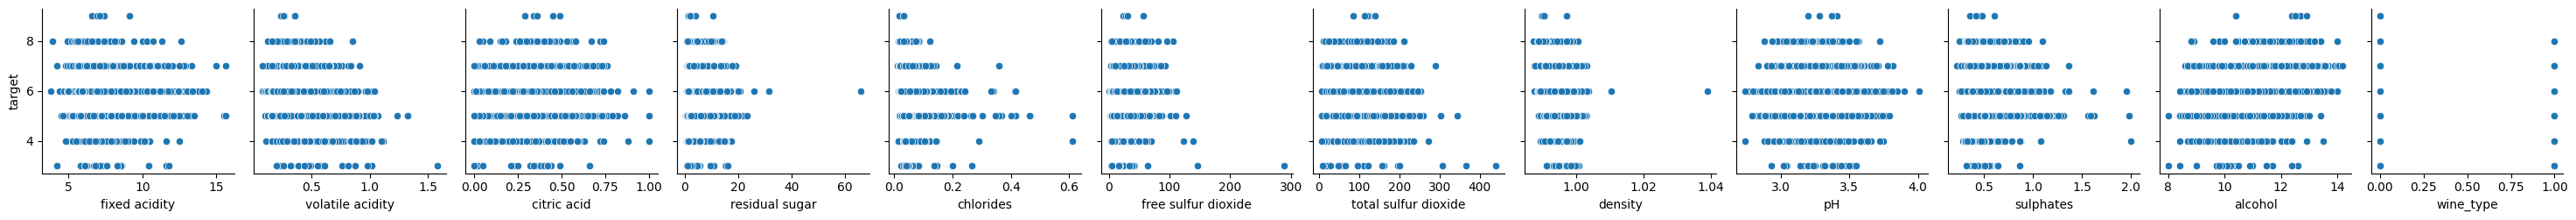

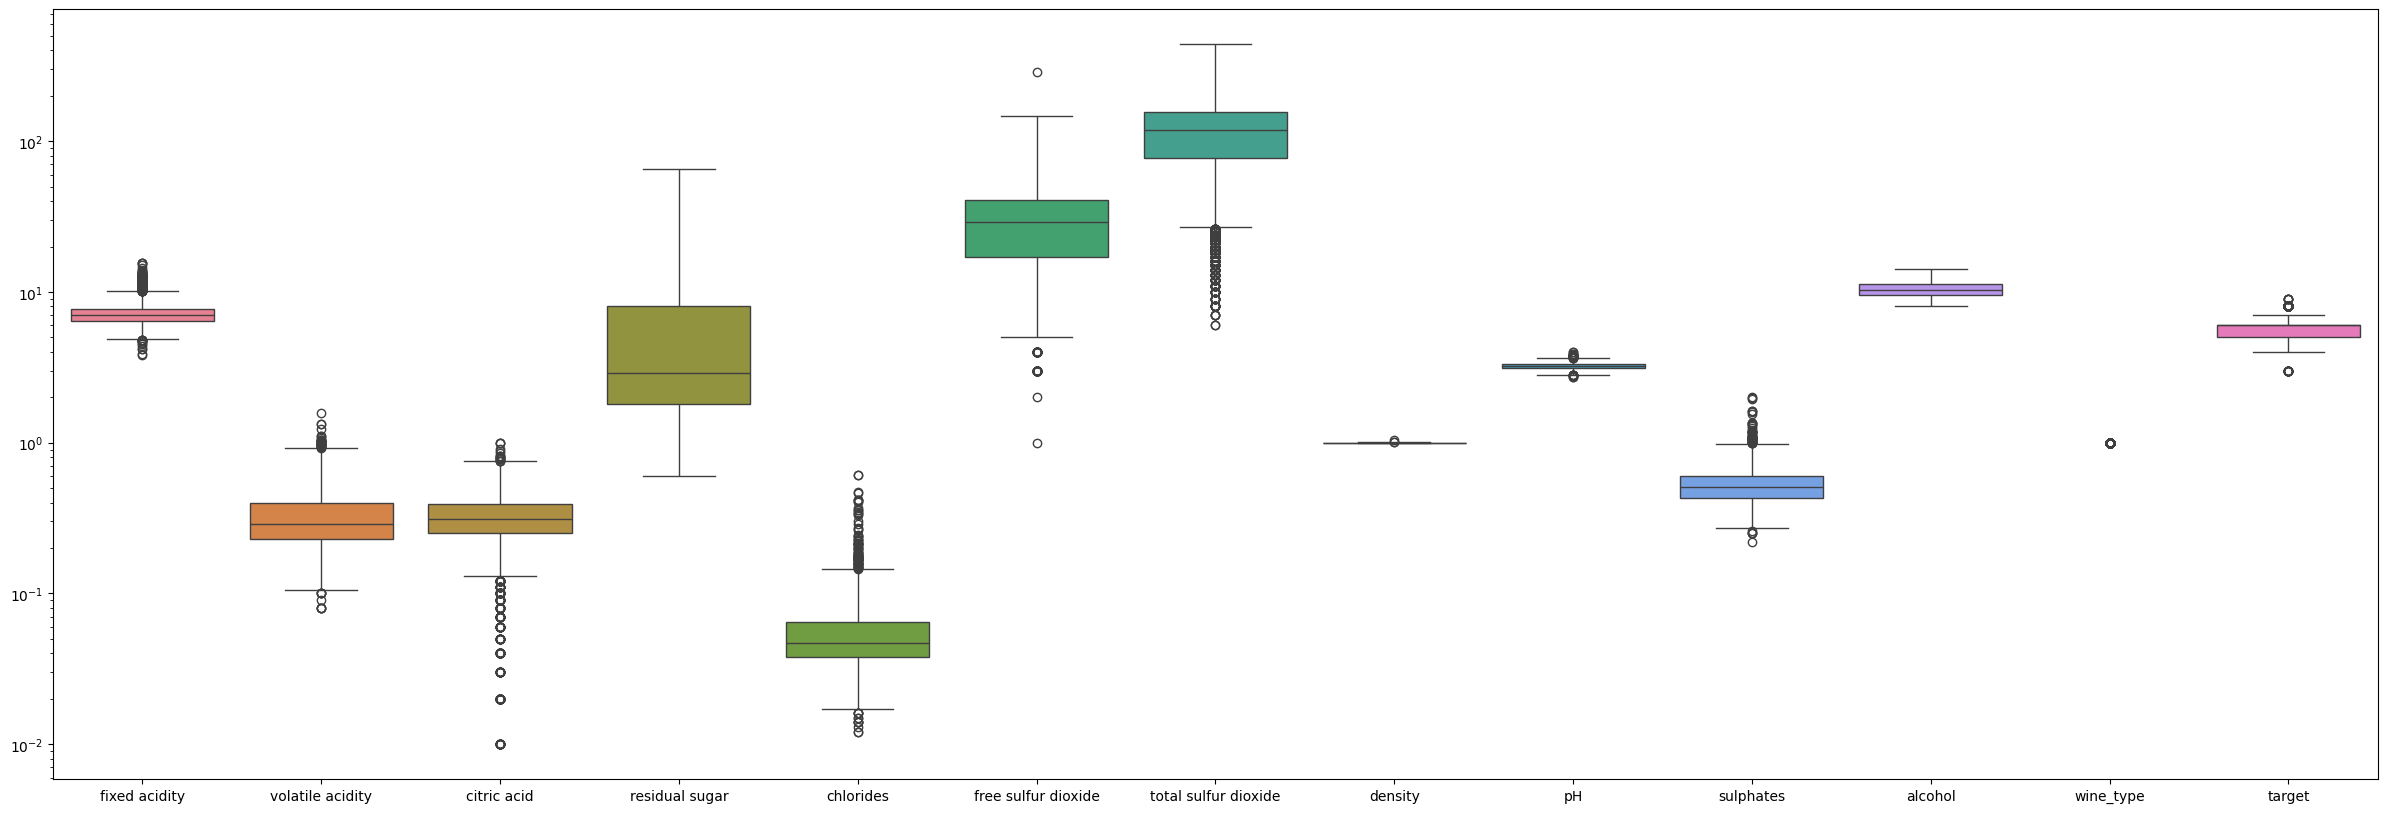

In [10]:
# Plot the scatter plot between target variable and other features
sns.pairplot(data, x_vars=data.columns[:-1], y_vars=['target'], kind='scatter')
plt.show()

# boxplot of all variables in log scale
plt.figure(figsize=(30, 10))
plt.yscale('log')
sns.boxplot(data=data)
plt.show()

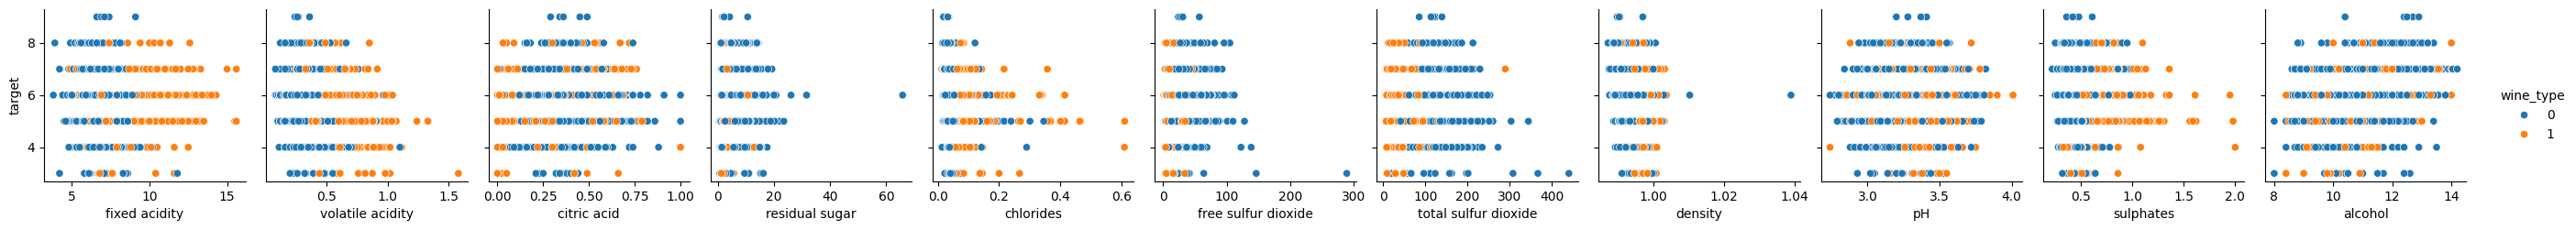

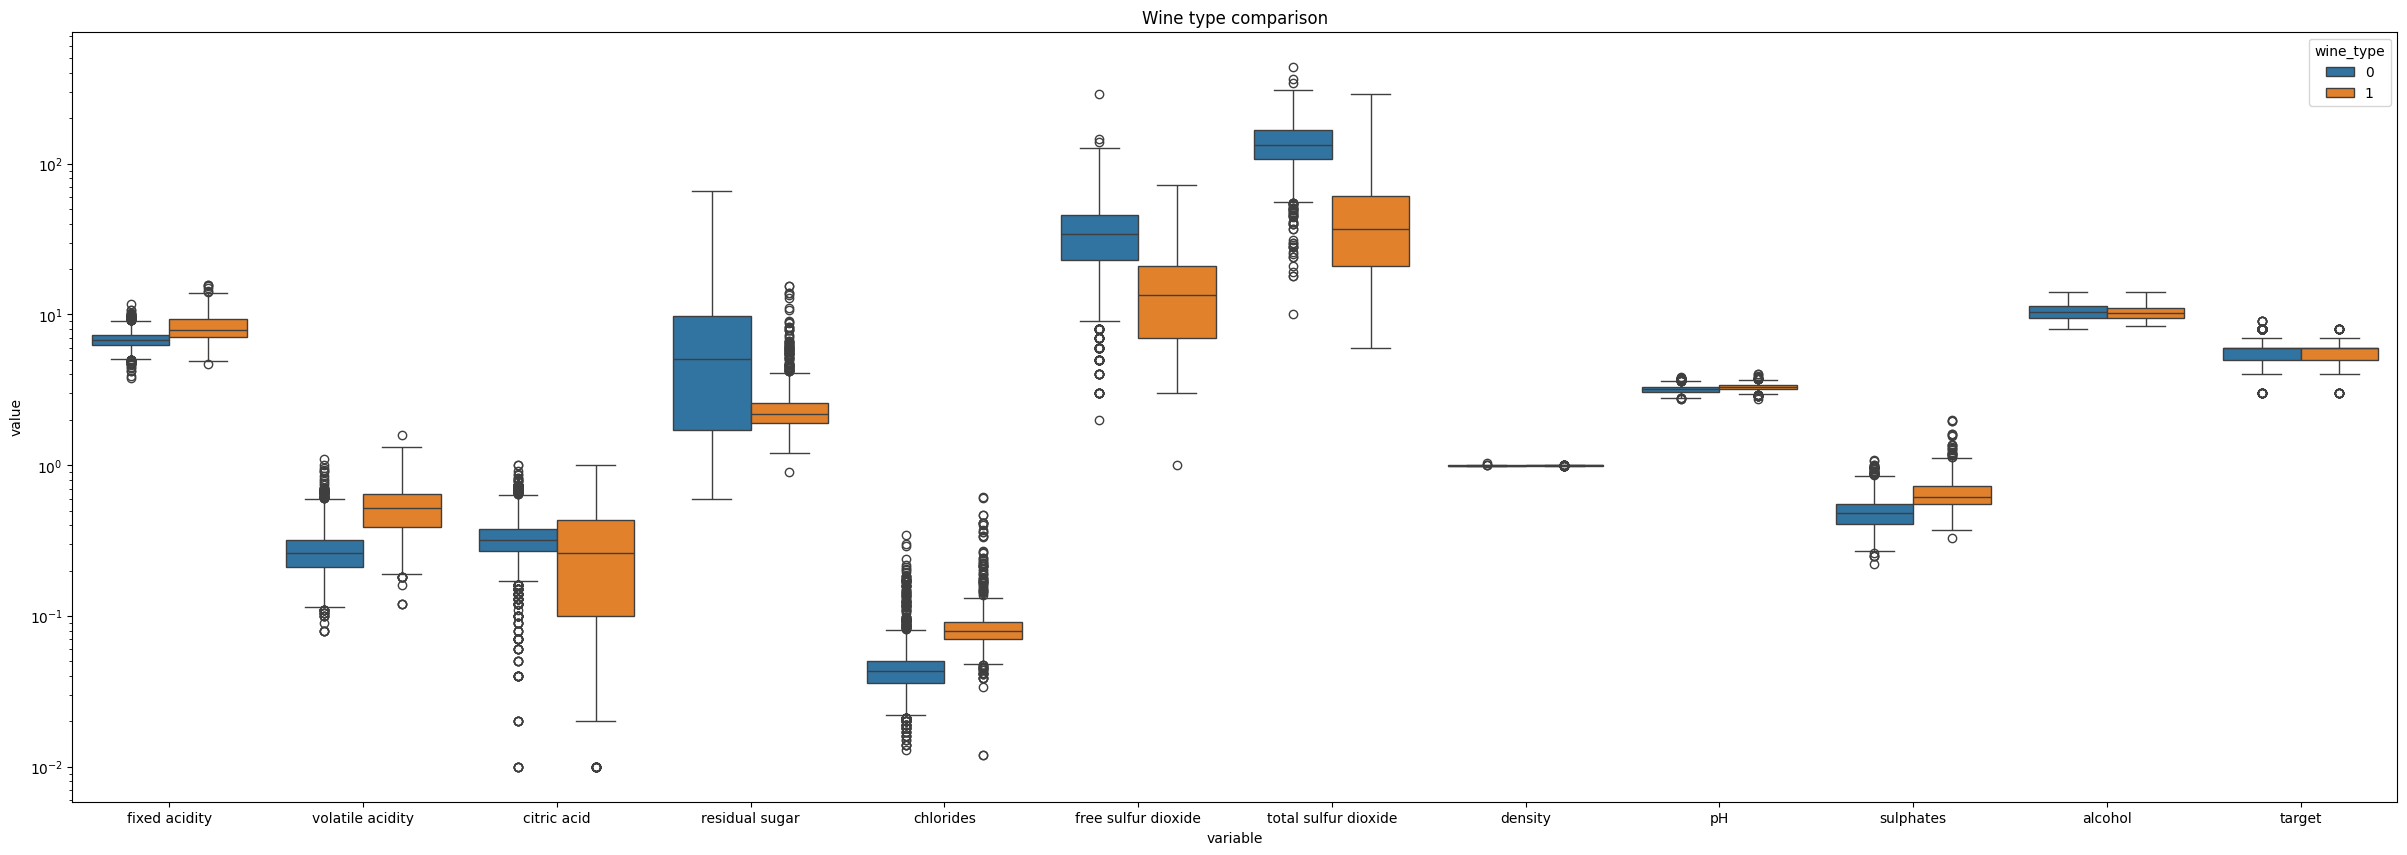

In [11]:
# Plot the scatter plot between target variable and other features
sns.pairplot(data, x_vars=data.columns[:-2], y_vars=['target'], hue=data.columns[-2], kind='scatter')
plt.show()

# Melt the DataFrame into a long-form DataFrame
melted_data = data.melt(id_vars='wine_type')

# Create a boxplot with 'wine_type' as the hue
plt.figure(figsize=(30, 10))
plt.yscale('log')
sns.boxplot(x='variable', y='value', hue='wine_type', data=melted_data)
plt.title('Wine type comparison')
plt.show()

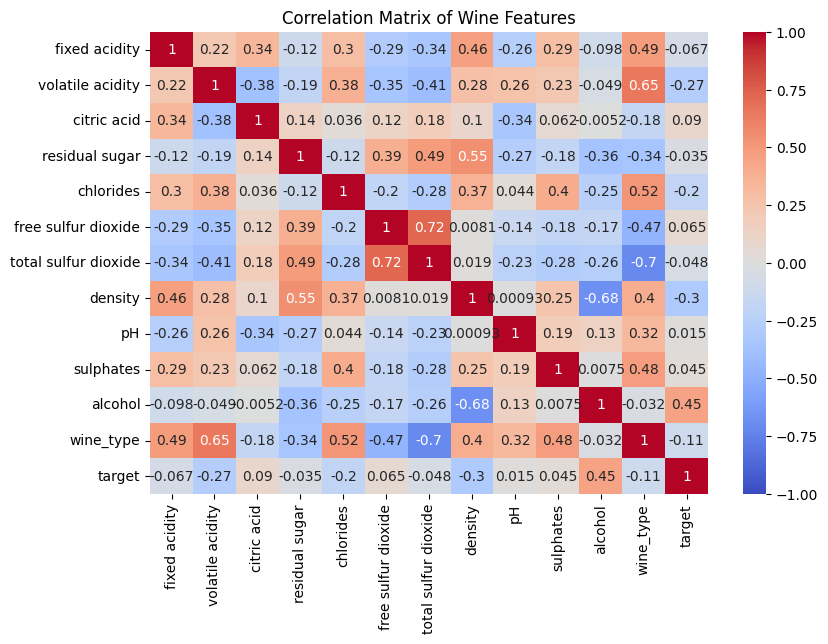

In [12]:
# Check the correlation between the features
plt.figure(figsize=(9, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Features')
plt.show()

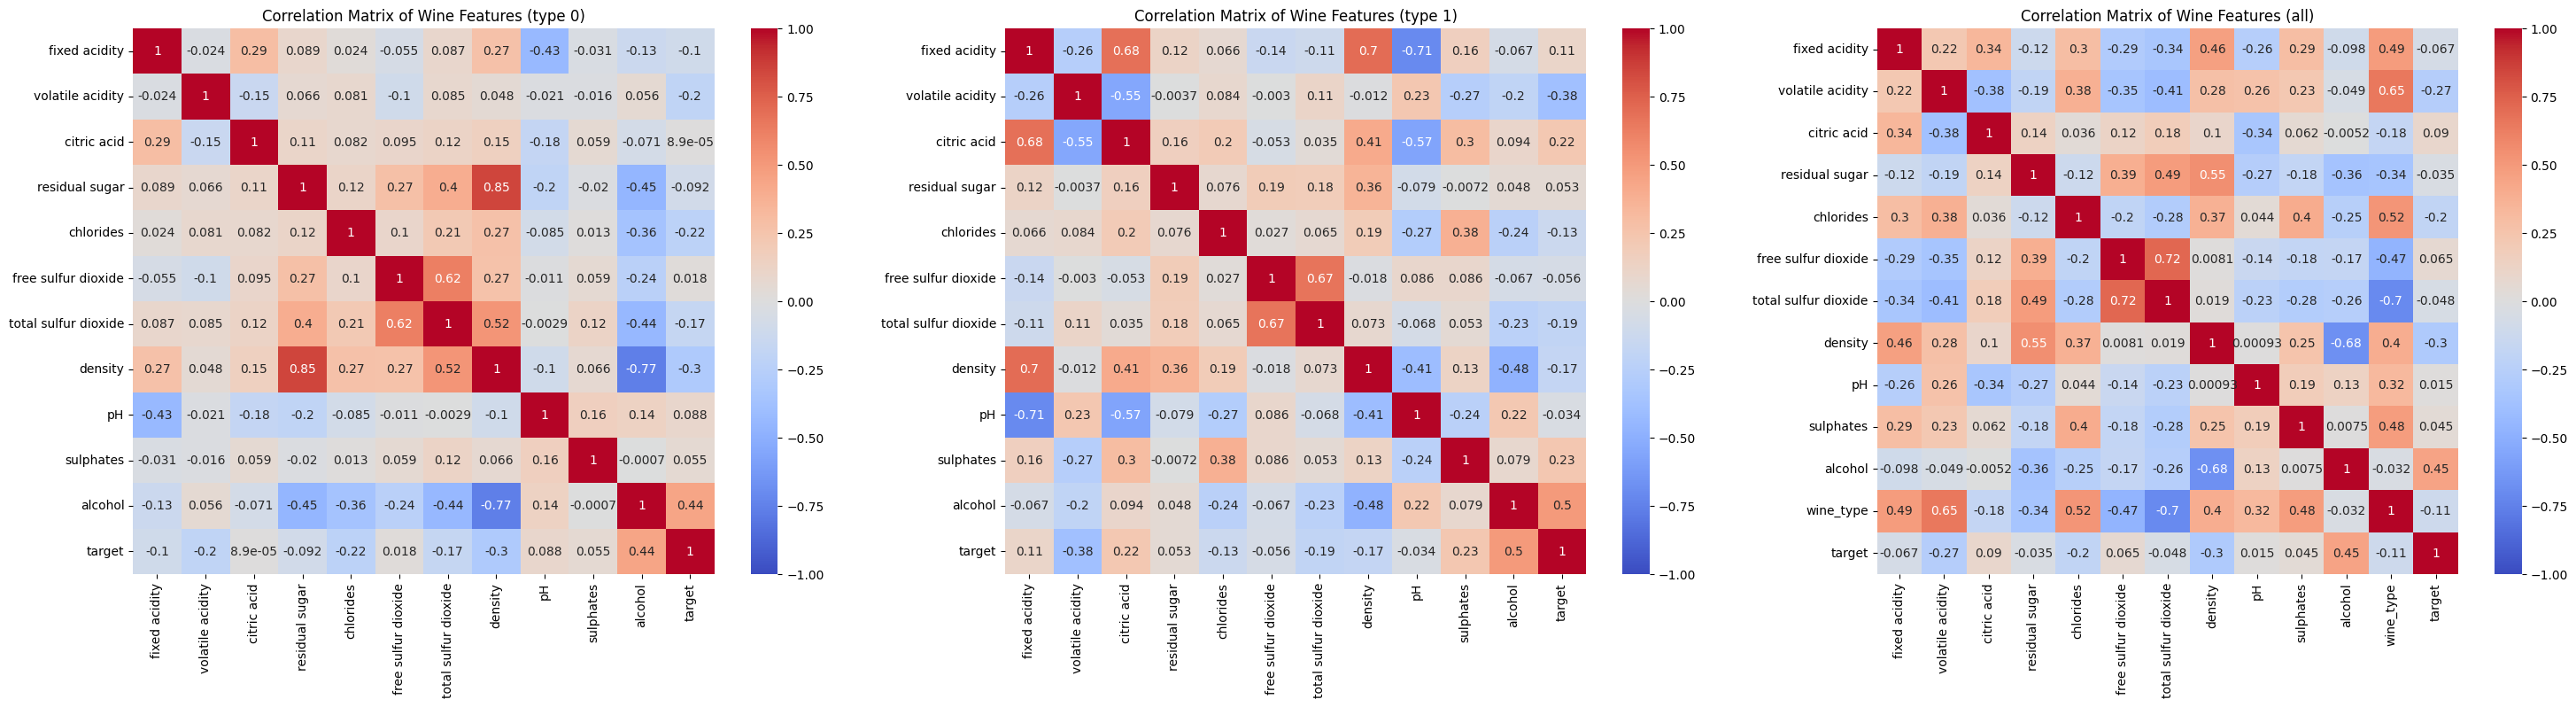

In [13]:
# check the correlation between the features for each wine type
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(36, 8))

sns.heatmap(data0.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax0)
ax0.set_title('Correlation Matrix of Wine Features (type 0)')

sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1)
ax1.set_title('Correlation Matrix of Wine Features (type 1)')

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Correlation Matrix of Wine Features (all)')


plt.show()


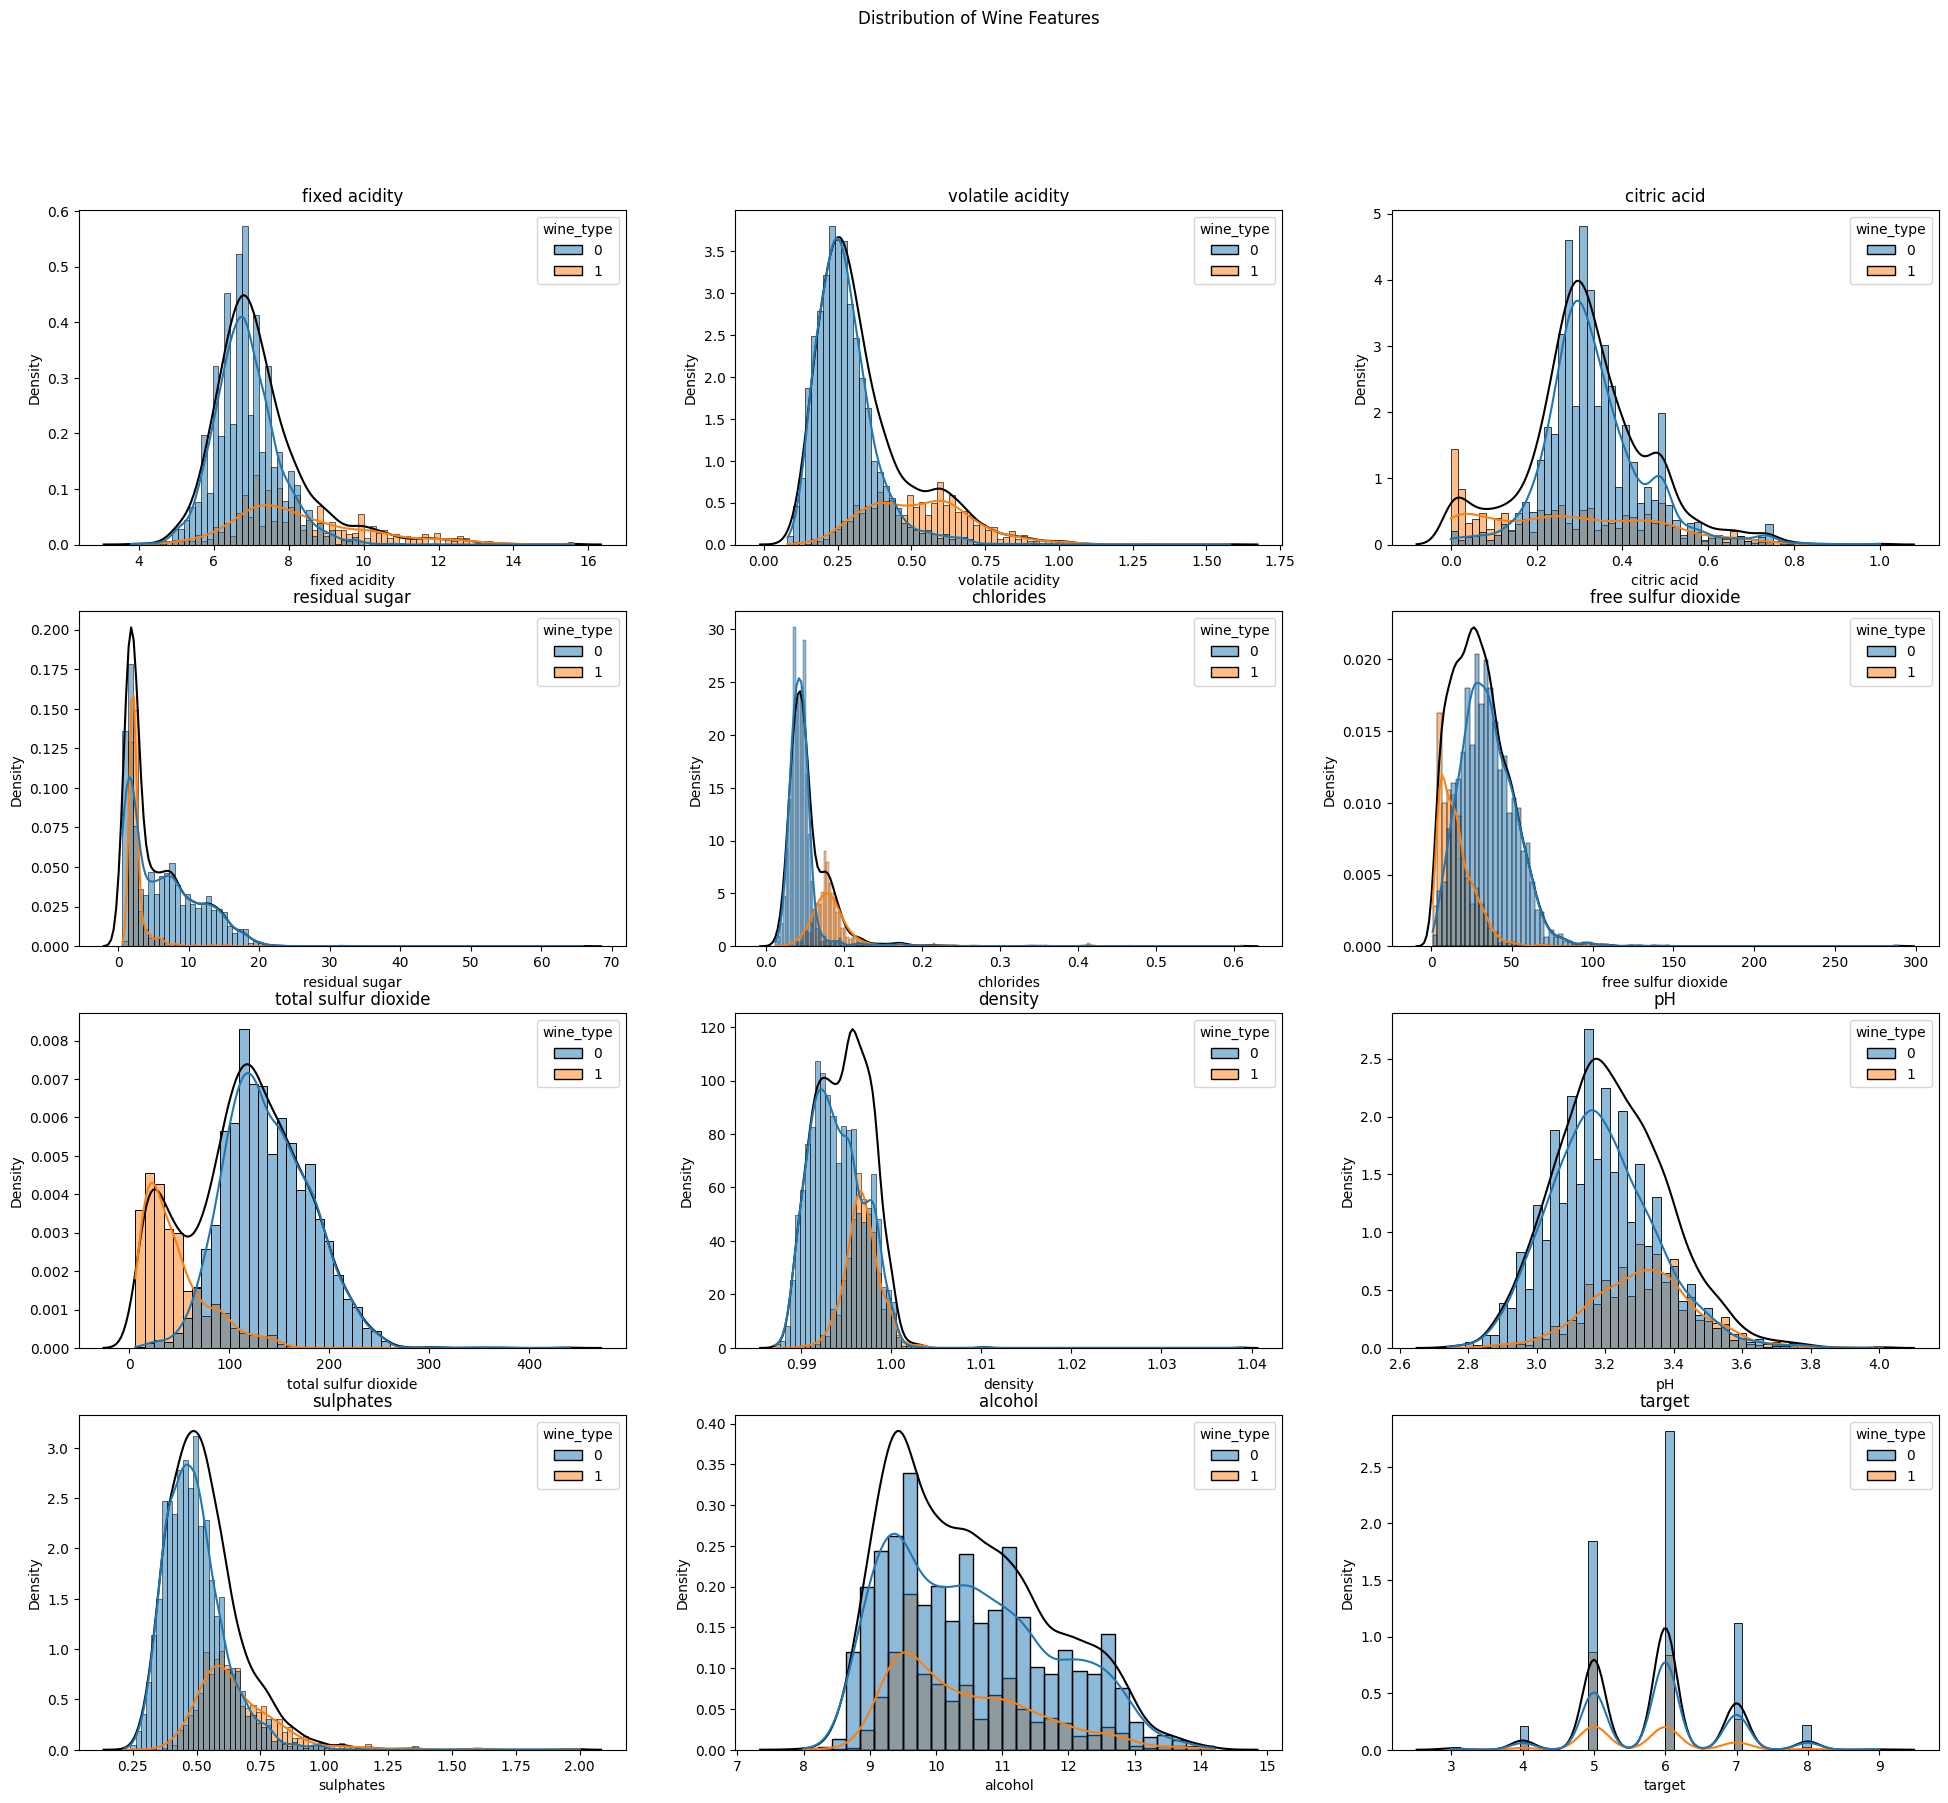

In [14]:
# observe the distribution of all the variables using sns
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
fig.suptitle('Distribution of Wine Features')

for i, ax in enumerate(axes.flatten()):
    if i == 11: i+=1 # skip the plot of wine type and use target instead
    sns.kdeplot(data=data, x=data.columns[i], ax=ax, color='black')
    sns.histplot(data=data, x=data.columns[i], ax=ax, kde=True, hue='wine_type', stat='density')
    ax.set_title(data.columns[i])
    
plt.show()


# Define Regression Models
Define the regression models to be used for comparison.

In [15]:
# Import the necessary regression models from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


all_models = []
all_models_names = []
all_params = []


# Define the regression models and their hyperparameters

#1
model = LinearRegression()
params = {}
all_models.append(model)
all_models_names.append('LinearRegression')
all_params.append(params)


#2
model = RandomForestRegressor(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    # 'max_depth': [None, 5, 10, 20],
}
all_models.append(model)
all_models_names.append('RandomForest')
all_params.append(params)


#3
model = ExtraTreesRegressor(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    # 'max_depth': [None, 5, 10, 20],
}
all_models.append(model)
all_models_names.append('ExtraTrees')
all_params.append(params)

#4
model = SVR(degree=5)
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10], 
}
all_models.append(model)
all_models_names.append('SVM')
all_params.append(params)

#5
model = KNeighborsRegressor()
params = {
    # 'n_neighbors': [3, 5, 7, 9, 11], 
    'n_neighbors': np.round(np.linspace(2, 20, 5), 0).astype(int), 
    'weights': ['uniform', 'distance']
}
all_models.append(model)
all_models_names.append('KNeighbors')
all_params.append(params)


#6
model = MLPRegressor(max_iter=500, random_state=rd_state)
params = {
    'hidden_layer_sizes': [(8, 16), (8, 16, 32), (16, 32, 16)], 
    # 'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.01, 0.1, 1],
}
all_models.append(model)
all_models_names.append('MLP')
all_params.append(params)

##



def create_lists_for_subset(models_names):
    models = []
    params = []
    for i, name in enumerate(all_models_names) :
        if name in models_names:
            models.append(all_models[i])
            params.append(all_params[i])        


    return models, params

# models_names = ['RandomForest', 'ExtraTrees']#, 'KNeighbors']
models_names = all_models_names

models, params = create_lists_for_subset(models_names)

# Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to tune the hyperparameters of each model and find the best performing set of parameters.

In [16]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create empty lists to store the best parameters and best scores for each model (and the dfs of the grid search)
dfs = []
best_params = []
best_scores = []

# Loop through each model and its corresponding hyperparameters
for model, param in zip(models, params):
    print(model.__class__.__name__)
    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clone(model), param, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    

    # Get the best parameters and best score
    dfs.append(pd.DataFrame(grid_search.cv_results_))
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

# Create a dataframe to store the best parameters and best scores for each model
df_grid_search_score = pd.DataFrame({'Model': models_names, 'best_params': best_params, 'best_CVscore': best_scores})

# Display the best parameters and best scores for each model
df_grid_search_score

LinearRegression
RandomForestRegressor
ExtraTreesRegressor
SVR
KNeighborsRegressor
MLPRegressor


c:\Users\MEEEE\Documents\University\M2\app non superevise\project_clean\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MEEEE\Documents\University\M2\app non superevise\project_clean\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,best_params,best_CVscore
0,LinearRegression,{},0.295
1,RandomForest,{'n_estimators': 1000},0.446
2,ExtraTrees,{'n_estimators': 1000},0.472
3,SVM,"{'C': 1, 'kernel': 'rbf'}",0.386
4,KNeighbors,"{'n_neighbors': 20, 'weights': 'distance'}",0.441
5,MLP,"{'alpha': 1, 'hidden_layer_sizes': (8, 16, 32)}",0.368


# Train and evaluate each best models 

In [17]:
# checking the model performance on the test set (using the best hyperparameters)

# Create empty lists to store the R-squared scores for each model
train_scores = []
test_scores = []
test_scores_classif = []

# Loop through each model and its corresponding best parameters
for model, param in zip(models, best_params):
    # Fit the model on the training data using the best parameters
    model.set_params(**param)
    model.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the performance using the R-squared score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    test_score_classif = r2_score(y_test, np.round(y_test_pred, 0))
    
    # Append the R-squared scores to the corresponding lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    test_scores_classif.append(test_score_classif)

# Create a dataframe to store the R-squared scores for each model
df_test_score = pd.DataFrame({'Model': models_names, 'Train Score': train_scores, 'test_score': test_scores, 'test_score_classif': test_scores_classif})

# Display the R-squared scores for each model
df_grid_search_score['test_score'] = df_test_score['test_score']
df_grid_search_score['test_score_classif'] = df_test_score['test_score_classif']
df_test_score


,Model,Train Score,test_score,test_score_classif
0,LinearRegression,0.302,0.311,0.190
1,RandomForest,0.928,0.438,0.364
2,ExtraTrees,1.000,0.464,0.387
3,SVM,0.481,0.355,0.264
4,KNeighbors,1.000,0.389,0.304
5,MLP,0.419,0.342,0.224


In [18]:
df_grid_search_score.drop(columns=['best_params'])

,Model,best_CVscore,test_score,test_score_classif
0,LinearRegression,0.295,0.311,0.190
1,RandomForest,0.446,0.438,0.364
2,ExtraTrees,0.472,0.464,0.387
3,SVM,0.386,0.355,0.264
4,KNeighbors,0.441,0.389,0.304
5,MLP,0.368,0.342,0.224


# train the best model on the whole training set and make predictions on the test set

using best model for the grid scores ?
or the test on the test dataset left out from the real training dataset ?

In [20]:
# for the best model for the grid search score
i_model = df_grid_search_score['best_CVscore'].idxmax()

# for the best model on the "fake" test dataset
i_model = df_test_score['test_score'].idxmax()

model = clone(models[i_model])
name_model = df_grid_search_score['Model'][i_model].replace(' ', '').replace('_', '')
param_model = df_grid_search_score['best_params'][i_model]


# load the test dataset and make prediction using the best model 
test_data = pd.read_csv(PATH_test)
train_data = pd.read_csv(PATH_train)

X_submit_train, y_submit_train = train_data.drop(columns=['wine_ID', 'target']), train_data['target']

X_submit, wine_ids = test_data.drop(columns=['wine_ID']), test_data['wine_ID']

scaler = StandardScaler()
X_submit_train, X_submit = scaler.fit_transform(X_submit_train), scaler.transform(X_submit)


# Predict on the test data using random forest
model.fit(X_submit_train, y_submit_train)
y_submit = model.predict(X_submit)




In [21]:
# Save predictions to file
param_model_str = ''
for key, value in param_model.items():
    param_model_str += key + '_' + str(value) + '_'
param_model_str = param_model_str[:-1]


filename = f'submits/wine_submit_{name_model}_{param_model_str}.csv'

pd.DataFrame({'wine_ID':wine_ids, 'target':y_submit}).to_csv(filename, index=False)